# RAW DATA Processing and MERGING as ONE TABLE

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Import Index Data from CSV
index_csv_file = '/content/index.csv'
index_df = pd.read_csv(index_csv_file, index_col=False)

# Import Surface Data from CSV
surface_csv_file = '/content/surface.csv'
surface_df = pd.read_csv(surface_csv_file, index_col=False)



In [ ]:
index_df

,YEAR,MONTH,DAY,SWEAT index,Showalter index,LIFTED index,K index,Cross totals index,Vertical totals index,Totals totals index,TLCL,PLCL,CINE,CAPE,PRECIPITABLE WATER,1000-500 THICKNESS
0,1981,1,1,91.2,12.4,13.4,-1.4,3.0,21.7,24.7,284.41,993.98,0.0,0.0,22.8,5636
1,1981,1,2,75.7,10.2,11.3,1.6,10.2,20.1,30.3,282.11,956.13,0.0,0.0,20.4,5592
2,1981,1,4,128.3,6.9,6.9,17.5,16.3,25.3,41.6,284.79,978.71,0.0,0.0,23.8,5581
3,1981,1,5,194.2,2.8,1.2,23.5,22.5,28.1,50.6,286.68,965.77,-138.5,83.1,28.6,5578
4,1981,1,6,151.4,5.1,1.8,25.4,18.9,24.9,43.8,289.11,975.72,-112.9,47.9,33.2,5648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11878,2020,12,27,75.7,17.1,17.2,-19.9,-24.3,21.8,-2.5,279.17,876.91,0.0,0.0,9.5,5731
11879,2020,12,28,67.9,15.9,15.5,-6.5,-21.5,20.4,-1.1,280.77,893.60,0.0,0.0,11.4,5718
11880,2020,12,29,98.9,16.2,16.1,-15.2,5.3,18.1,23.4,278.86,862.08,0.0,0.0,13.4,5717
11881,2020,12,30,135.8,13.4,12.2,-6.5,11.4,18.1,29.5,282.07,892.90,0.0,0.0,16.2,5715


In [ ]:
surface_df

,YEAR,MONTH,DAY,MAXT,MINT,TH
0,1981,1,1,26.0,12.1,0
1,1981,1,2,25.0,11.6,0
2,1981,1,3,25.4,11.3,0
3,1981,1,4,25.8,11.8,0
4,1981,1,5,28.2,13.9,0
...,...,...,...,...,...,...
14391,2020,12,27,24.5,12.6,0
14392,2020,12,28,24.5,10.8,0
14393,2020,12,29,24.8,11.4,0
14394,2020,12,30,25.6,12.7,0


COUNT OF TH BEFORE MERGING

In [ ]:
th_counts = surface_df['TH'].value_counts()
print(th_counts)


0    11624
1     2772
Name: TH, dtype: int64


# MERGING

In [ ]:
index_df.describe()

,YEAR,MONTH,DAY,SWEAT index,Showalter index,LIFTED index,K index,Cross totals index,Vertical totals index,Totals totals index,TLCL,PLCL,CINE,CAPE,PRECIPITABLE WATER,1000-500 THICKNESS
count,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000,11883.000000
mean,1998.286712,6.539510,15.728099,182.923858,6.931743,0.521754,23.206581,15.603484,24.329142,39.932626,292.705253,952.021543,-63.671472,900.712421,40.506825,5750.025162
std,11.154318,3.433968,8.819977,92.033776,4.465433,7.002176,15.823667,7.171165,4.109635,9.294096,6.189168,39.226386,404.003436,1332.376203,17.504832,70.235229
min,1981.000000,1.000000,1.000000,5.800000,-9.600000,-21.700000,-62.300000,-36.700000,8.900000,-17.900000,254.750000,497.250000,-29338.900000,0.000000,-24.400000,5530.000000
25%,1989.000000,4.000000,8.000000,104.600000,4.100000,-4.300000,11.400000,11.900000,21.700000,35.400000,288.035000,935.950000,-79.700000,0.000000,25.400000,5699.000000
50%,1997.000000,7.000000,16.000000,185.300000,6.600000,-1.400000,28.200000,17.700000,23.700000,41.800000,294.790000,961.010000,-12.900000,87.800000,38.600000,5757.000000
75%,2005.500000,10.000000,23.000000,249.050000,9.400000,4.600000,35.800000,20.700000,26.800000,45.800000,297.760000,979.870000,0.000000,1544.150000,55.400000,5806.000000
max,2020.000000,12.000000,31.000000,850.700000,44.100000,27.800000,62.100000,33.300000,40.700000,69.800000,310.810000,1168.110000,29.000000,16555.900000,98.900000,5961.000000


In [ ]:
surface_df.describe()

,YEAR,MONTH,DAY,MAXT,MINT,TH
count,14396.000000,14396.000000,14396.000000,14360.000000,14377.000000,14396.000000
mean,2000.325090,6.517366,15.726382,31.855376,22.135988,0.192553
std,11.425919,3.452860,8.800452,3.940901,5.353824,0.394319
min,1981.000000,1.000000,1.000000,14.800000,6.600000,0.000000
25%,1990.000000,4.000000,8.000000,29.200000,18.000000,0.000000
50%,2000.000000,7.000000,16.000000,32.500000,24.300000,0.000000
75%,2010.000000,10.000000,23.000000,34.700000,26.400000,0.000000
max,2020.000000,12.000000,31.000000,43.100000,32.100000,1.000000


In [ ]:
import pandas as pd

# Assuming you have two dataframes: index_df and surface_df

# Concatenate the columns and create a new "Date" column
index_df['Date'] = pd.to_datetime(index_df[['YEAR', 'MONTH', 'DAY']]).dt.strftime('%d/%m/%Y')
surface_df['Date'] = pd.to_datetime(surface_df[['YEAR', 'MONTH', 'DAY']]).dt.strftime('%d/%m/%Y')




Coverting dates into date

In [ ]:
index_df

,YEAR,MONTH,DAY,SWEAT index,Showalter index,LIFTED index,K index,Cross totals index,Vertical totals index,Totals totals index,TLCL,PLCL,CINE,CAPE,PRECIPITABLE WATER,1000-500 THICKNESS,Date
0,1981,1,1,91.2,12.4,13.4,-1.4,3.0,21.7,24.7,284.41,993.98,0.0,0.0,22.8,5636,01/01/1981
1,1981,1,2,75.7,10.2,11.3,1.6,10.2,20.1,30.3,282.11,956.13,0.0,0.0,20.4,5592,02/01/1981
2,1981,1,4,128.3,6.9,6.9,17.5,16.3,25.3,41.6,284.79,978.71,0.0,0.0,23.8,5581,04/01/1981
3,1981,1,5,194.2,2.8,1.2,23.5,22.5,28.1,50.6,286.68,965.77,-138.5,83.1,28.6,5578,05/01/1981
4,1981,1,6,151.4,5.1,1.8,25.4,18.9,24.9,43.8,289.11,975.72,-112.9,47.9,33.2,5648,06/01/1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11878,2020,12,27,75.7,17.1,17.2,-19.9,-24.3,21.8,-2.5,279.17,876.91,0.0,0.0,9.5,5731,27/12/2020
11879,2020,12,28,67.9,15.9,15.5,-6.5,-21.5,20.4,-1.1,280.77,893.60,0.0,0.0,11.4,5718,28/12/2020
11880,2020,12,29,98.9,16.2,16.1,-15.2,5.3,18.1,23.4,278.86,862.08,0.0,0.0,13.4,5717,29/12/2020
11881,2020,12,30,135.8,13.4,12.2,-6.5,11.4,18.1,29.5,282.07,892.90,0.0,0.0,16.2,5715,30/12/2020


In [ ]:
surface_df

,YEAR,MONTH,DAY,MAXT,MINT,TH,Date
0,1981,1,1,26.0,12.1,0,01/01/1981
1,1981,1,2,25.0,11.6,0,02/01/1981
2,1981,1,3,25.4,11.3,0,03/01/1981
3,1981,1,4,25.8,11.8,0,04/01/1981
4,1981,1,5,28.2,13.9,0,05/01/1981
...,...,...,...,...,...,...,...
14391,2020,12,27,24.5,12.6,0,27/12/2020
14392,2020,12,28,24.5,10.8,0,28/12/2020
14393,2020,12,29,24.8,11.4,0,29/12/2020
14394,2020,12,30,25.6,12.7,0,30/12/2020


In [ ]:
columns_to_drop = ['DAY','MONTH','YEAR']
surface_df.drop(columns=columns_to_drop, inplace=True)
index_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
merged_df = pd.merge(index_df, surface_df, on='Date', how='inner')

In [ ]:
merged_df.to_csv('merged_df_all12.csv', index=False)

# Importing merged_df

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
merged_df = pd.read_csv('merged_df_all12k.csv')

# Perform operations on the DataFrame
# For example, you can display the first few rows
print(merged_df.head())


       Date  SWEAT index  Showalter index  LIFTED index  K index  \
0  1/1/1981         91.2             12.4          13.4     -1.4   
1  2/1/1981         75.7             10.2          11.3      1.6   
2  4/1/1981        128.3              6.9           6.9     17.5   
3  5/1/1981        194.2              2.8           1.2     23.5   
4  6/1/1981        151.4              5.1           1.8     25.4   

   Cross totals index  Vertical totals index  Totals totals index    TLCL  \
0                 3.0                   21.7                 24.7  284.41   
1                10.2                   20.1                 30.3  282.11   
2                16.3                   25.3                 41.6  284.79   
3                22.5                   28.1                 50.6  286.68   
4                18.9                   24.9                 43.8  289.11   

     PLCL   CINE  CAPE  PRECIPITABLE WATER  1000-500 THICKNESS  MAXT  MINT  TH  
0  993.98    0.0   0.0                22.8     

In [ ]:
merged_df

,Date,SWEAT index,Showalter index,LIFTED index,K index,Cross totals index,Vertical totals index,Totals totals index,TLCL,PLCL,CINE,CAPE,PRECIPITABLE WATER,1000-500 THICKNESS,MAXT,MINT,TH
0,1/1/1981,91.2,12.4,13.4,-1.4,3.0,21.7,24.7,284.41,993.98,0.0,0.0,22.8,5636,26.0,12.1,0
1,2/1/1981,75.7,10.2,11.3,1.6,10.2,20.1,30.3,282.11,956.13,0.0,0.0,20.4,5592,25.0,11.6,0
2,4/1/1981,128.3,6.9,6.9,17.5,16.3,25.3,41.6,284.79,978.71,0.0,0.0,23.8,5581,25.8,11.8,0
3,5/1/1981,194.2,2.8,1.2,23.5,22.5,28.1,50.6,286.68,965.77,-138.5,83.1,28.6,5578,28.2,13.9,0
4,6/1/1981,151.4,5.1,1.8,25.4,18.9,24.9,43.8,289.11,975.72,-112.9,47.9,33.2,5648,28.0,16.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,27/12/2020,75.7,17.1,17.2,-19.9,-24.3,21.8,-2.5,279.17,876.91,0.0,0.0,9.5,5731,24.5,12.6,0
11678,28/12/2020,67.9,15.9,15.5,-6.5,-21.5,20.4,-1.1,280.77,893.60,0.0,0.0,11.4,5718,24.5,10.8,0
11679,29/12/2020,98.9,16.2,16.1,-15.2,5.3,18.1,23.4,278.86,862.08,0.0,0.0,13.4,5717,24.8,11.4,0
11680,30/12/2020,135.8,13.4,12.2,-6.5,11.4,18.1,29.5,282.07,892.90,0.0,0.0,16.2,5715,25.6,12.7,0


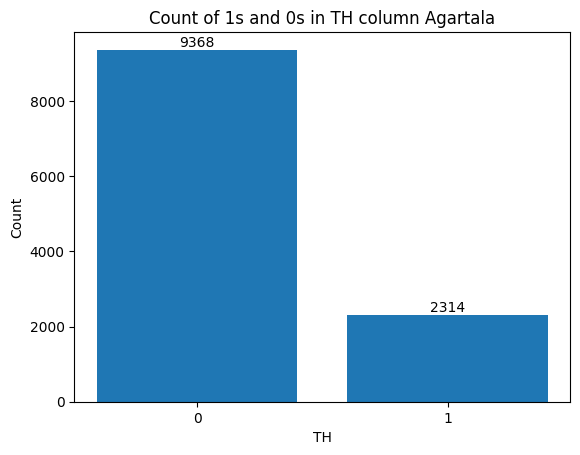

In [ ]:


import matplotlib.pyplot as plt

th_counts = merged_df['TH'].value_counts()

# Plotting the counts
plt.bar(th_counts.index, th_counts.values)

# Adding labels and title
plt.xlabel('TH')
plt.ylabel('Count')
plt.title('Count of 1s and 0s in TH column Agartala')

# Customizing x-axis tick labels
plt.xticks([0, 1], ['0', '1'])

# Adding count labels on top of each bar
for i, count in enumerate(th_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

In [ ]:
merged_df.drop(['MAXT', 'MINT'], axis=1, inplace=True)

# Combining

In [ ]:
# Combine variables and create new features
merged_df['Environmental_Stability'] = merged_df['Showalter index'] + merged_df['LIFTED index']
merged_df['Moisture_Indices'] = merged_df['PRECIPITABLE WATER']
merged_df['Convective_Potential'] = merged_df['CAPE'] + merged_df['CINE']
merged_df['Temperature_Pressure'] = merged_df['1000-500 THICKNESS']
merged_df['Moisture_Temperature_Profiles'] = merged_df['PLCL']

# Drop the original variables
merged_df.drop(['Showalter index', 'LIFTED index', 'PRECIPITABLE WATER', 'Cross totals index', 'Vertical totals index', 'CAPE', 'CINE', '1000-500 THICKNESS', 'TLCL', 'PLCL'], axis=1, inplace=True)


In [ ]:
merged_df

,Date,SWEAT index,K index,Totals totals index,TH,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles
0,1/1/1981,91.2,-1.4,24.7,0,25.8,22.8,0.0,5636,993.98
1,2/1/1981,75.7,1.6,30.3,0,21.5,20.4,0.0,5592,956.13
2,4/1/1981,128.3,17.5,41.6,0,13.8,23.8,0.0,5581,978.71
3,5/1/1981,194.2,23.5,50.6,0,4.0,28.6,-55.4,5578,965.77
4,6/1/1981,151.4,25.4,43.8,0,6.9,33.2,-65.0,5648,975.72
...,...,...,...,...,...,...,...,...,...,...
11677,27/12/2020,75.7,-19.9,-2.5,0,34.3,9.5,0.0,5731,876.91
11678,28/12/2020,67.9,-6.5,-1.1,0,31.4,11.4,0.0,5718,893.60
11679,29/12/2020,98.9,-15.2,23.4,0,32.3,13.4,0.0,5717,862.08
11680,30/12/2020,135.8,-6.5,29.5,0,25.6,16.2,0.0,5715,892.90


In [ ]:
# Get the column names
columns = list(merged_df.columns)

# Remove the 'TH' column from the list
columns.remove('TH')

# Append the 'TH' column at the end of the list
columns.append('TH')

# Reorder the columns in the DataFrame
merged_df = merged_df[columns]


In [ ]:
merged_df

,Date,SWEAT index,K index,Totals totals index,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles,TH
0,1/1/1981,91.2,-1.4,24.7,25.8,22.8,0.0,5636,993.98,0
1,2/1/1981,75.7,1.6,30.3,21.5,20.4,0.0,5592,956.13,0
2,4/1/1981,128.3,17.5,41.6,13.8,23.8,0.0,5581,978.71,0
3,5/1/1981,194.2,23.5,50.6,4.0,28.6,-55.4,5578,965.77,0
4,6/1/1981,151.4,25.4,43.8,6.9,33.2,-65.0,5648,975.72,0
...,...,...,...,...,...,...,...,...,...,...
11677,27/12/2020,75.7,-19.9,-2.5,34.3,9.5,0.0,5731,876.91,0
11678,28/12/2020,67.9,-6.5,-1.1,31.4,11.4,0.0,5718,893.60,0
11679,29/12/2020,98.9,-15.2,23.4,32.3,13.4,0.0,5717,862.08,0
11680,30/12/2020,135.8,-6.5,29.5,25.6,16.2,0.0,5715,892.90,0


In [ ]:
merged_df.describe()

,SWEAT index,K index,Totals totals index,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles,TH
count,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000
mean,182.959082,23.204152,39.936329,7.457833,40.474722,842.059964,5749.726331,952.163323,0.198083
std,92.178106,15.816099,9.305384,11.181312,17.502643,1399.496469,70.269779,39.198689,0.398572
min,5.800000,-62.300000,-17.900000,-29.100000,-24.400000,-29336.700000,5530.000000,497.250000,0.000000
25%,104.500000,11.400000,35.400000,0.100000,25.400000,0.000000,5699.000000,936.052500,0.000000
50%,185.100000,28.100000,41.800000,5.200000,38.500000,16.000000,5757.000000,961.070000,0.000000
75%,249.200000,35.800000,45.800000,13.400000,55.300000,1490.200000,5805.000000,979.870000,0.000000
max,850.700000,62.100000,69.800000,58.000000,98.900000,16540.400000,5961.000000,1168.110000,1.000000


In [ ]:
merged_df.to_csv('merged_df_all12k_combined.csv', index=False)

# COMBINED IMPORT

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
merged_df = pd.read_csv('merged_df_all12k_combined.csv')

# Perform operations on the DataFrame
# For example, you can display the first few rows
print(merged_df.head())


       Date  SWEAT index  K index  Totals totals index  \
0  1/1/1981         91.2     -1.4                 24.7   
1  2/1/1981         75.7      1.6                 30.3   
2  4/1/1981        128.3     17.5                 41.6   
3  5/1/1981        194.2     23.5                 50.6   
4  6/1/1981        151.4     25.4                 43.8   

   Environmental_Stability  Moisture_Indices  Convective_Potential  \
0                     25.8              22.8                   0.0   
1                     21.5              20.4                   0.0   
2                     13.8              23.8                   0.0   
3                      4.0              28.6                 -55.4   
4                      6.9              33.2                 -65.0   

   Temperature_Pressure  Moisture_Temperature_Profiles  TH  
0                  5636                         993.98   0  
1                  5592                         956.13   0  
2                  5581                        

# 3 months model

In [ ]:
# Convert the 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract the month from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month

# Filter the data for the desired months (March, April, May)
filtered_df = merged_df[merged_df['Month'].isin([3, 4, 5])]

# Drop the 'Date' and 'Month' columns since they are no longer needed
filtered_df = filtered_df.drop(['Month'], axis=1)
filtered_df


<ipython-input-3-0ba02b849609>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['Date'] = pd.to_datetime(merged_df['Date'])


,Date,SWEAT index,K index,Totals totals index,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles,TH
2,1981-04-01,128.3,17.5,41.6,13.8,23.8,0.0,5581,978.71,0
3,1981-05-01,194.2,23.5,50.6,4.0,28.6,-55.4,5578,965.77,0
30,1981-03-02,71.9,7.2,35.6,18.0,24.2,0.0,5617,912.77,0
31,1981-04-02,126.5,7.8,32.0,21.4,23.6,0.0,5640,968.52,0
32,1981-05-02,109.3,6.8,31.8,25.2,23.0,0.0,5684,968.49,0
...,...,...,...,...,...,...,...,...,...,...
11625,2020-04-11,49.7,19.0,30.7,16.1,27.8,0.0,5760,865.43,0
11626,2020-05-11,132.5,1.6,36.3,16.4,21.7,0.0,5744,883.74,0
11653,2020-03-12,74.2,5.3,31.0,17.9,19.0,0.0,5720,901.23,0
11654,2020-04-12,150.4,6.1,34.8,14.0,20.4,0.0,5693,929.51,0


In [ ]:
filtered_df = filtered_df.drop(['Date'], axis=1)

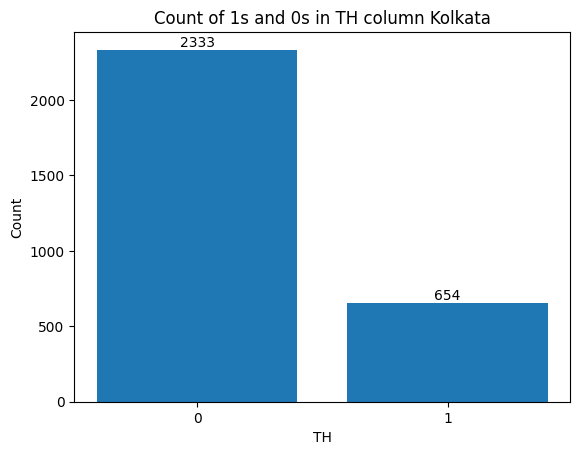

In [ ]:
import matplotlib.pyplot as plt

th_counts = filtered_df['TH'].value_counts()

# Plotting the counts
plt.bar(th_counts.index, th_counts.values)

# Adding labels and title
plt.xlabel('TH')
plt.ylabel('Count')
plt.title('Count of 1s and 0s in TH column Kolkata')

# Customizing x-axis tick labels
plt.xticks([0, 1], ['0', '1'])

# Adding count labels on top of each bar
for i, count in enumerate(th_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

### RANDOM FOREST CLASSIIER

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the independent and dependent variables
X = filtered_df[['SWEAT index', 'K index', 'Totals totals index', 'Environmental_Stability',
               'Moisture_Indices', 'Convective_Potential', 'Temperature_Pressure',
               'Moisture_Temperature_Profiles']]
y = filtered_df['TH']

# Perform SMOTE oversampling to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create the Random Forest Classifier model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate additional performance metrics
total_positives = cm[1].sum()
total_negatives = cm[0].sum()
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

pod = true_positives / total_positives  # Probability of Detection
far = false_positives / total_negatives  # False Alarm Rate
hss = 2 * ((true_positives * true_negatives) - (false_positives * false_negatives)) / (
        (true_positives + false_negatives) * (false_positives + true_negatives) +
        (true_positives + false_positives) * (false_negatives + true_negatives))  # Heidke Skill Score
csi = true_positives / (true_positives + false_positives + false_negatives)  # Critical Success Index

# Print the evaluation metrics and additional performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


import joblib

# Save the trained model to a file
joblib.dump(model, 'kolkata.pkl')


Accuracy: 0.8072805139186295
Precision: 0.782051282051282
Recall: 0.875
F1-score: 0.825918762088975
Probability of Detection (POD): 0.875
False Alarm Rate (FAR): 0.26681614349775784
Heidke Skill Score (HSS): 0.6163968931026133
Critical Success Index (CSI): 0.7034596375617792


['kolkata.pkl']

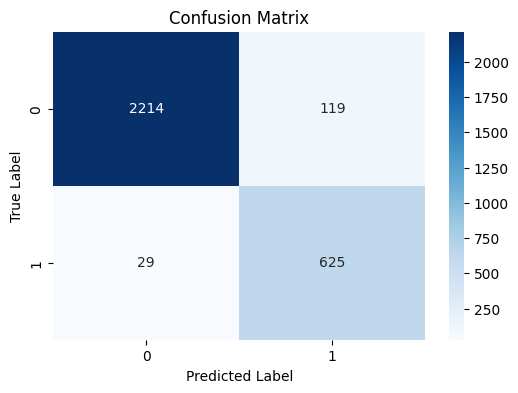

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the entire dataset
predictions = model.predict(X)

# Convert predictions to 1D array and apply the threshold
predictions = np.where(predictions.flatten() > 0.6, 1, 0)

# Create a new DataFrame with the original features, true labels, and predicted labels
result_df = pd.DataFrame(data=X, columns=X.columns)
result_df['True Label'] = y
result_df['Predicted Label'] = predictions

# Get the true labels and predicted labels
true_labels = result_df['True Label']
predicted_labels = result_df['Predicted Label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


### XG BOOST

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the independent and dependent variables
X = filtered_df[['SWEAT index', 'K index', 'Totals totals index', 'Environmental_Stability',
               'Moisture_Indices', 'Convective_Potential', 'Temperature_Pressure',
               'Moisture_Temperature_Profiles']]
y = filtered_df['TH']

# Perform SMOTE oversampling to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create the XGBoost Classifier model
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate additional performance metrics
total_positives = cm[1].sum()
total_negatives = cm[0].sum()
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

pod = true_positives / total_positives  # Probability of Detection
far = false_positives / total_negatives  # False Alarm Rate
hss = 2 * ((true_positives * true_negatives) - (false_positives * false_negatives)) / (
        (true_positives + false_negatives) * (false_positives + true_negatives) +
        (true_positives + false_positives) * (false_negatives + true_negatives))  # Heidke Skill Score
csi = true_positives / (true_positives + false_positives + false_negatives)  # Critical Success Index

# Print the evaluation metrics and additional performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


Accuracy: 0.791220556745182
Precision: 0.7738317757009345
Recall: 0.8483606557377049
F1-score: 0.8093841642228738
Probability of Detection (POD): 0.8483606557377049
False Alarm Rate (FAR): 0.2713004484304933
Heidke Skill Score (HSS): 0.5826593027814053
Critical Success Index (CSI): 0.6798029556650246


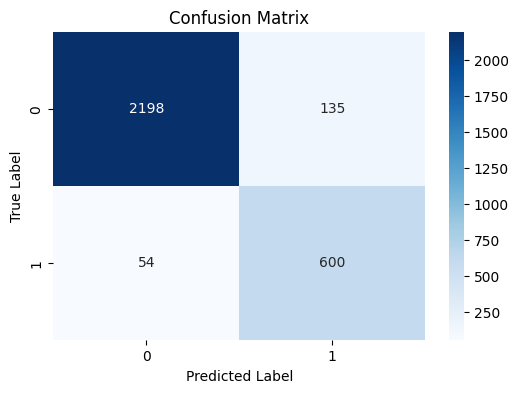

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the entire dataset
predictions = model.predict(X)

# Convert predictions to 1D array and apply the threshold
predictions = np.where(predictions.flatten() > 0.6, 1, 0)

# Create a new DataFrame with the original features, true labels, and predicted labels
result_df = pd.DataFrame(data=X, columns=X.columns)
result_df['True Label'] = y
result_df['Predicted Label'] = predictions

# Get the true labels and predicted labels
true_labels = result_df['True Label']
predicted_labels = result_df['Predicted Label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


### SVM

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the independent and dependent variables
X = filtered_df[['SWEAT index', 'K index', 'Totals totals index', 'Environmental_Stability',
               'Moisture_Indices', 'Convective_Potential', 'Temperature_Pressure',
               'Moisture_Temperature_Profiles']]
y = filtered_df['TH']

# Perform SMOTE oversampling to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create the SVM Classifier model
model = SVC()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate additional performance metrics
total_positives = cm[1].sum()
total_negatives = cm[0].sum()
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

pod = true_positives / total_positives  # Probability of Detection
far = false_positives / total_negatives  # False Alarm Rate
hss = 2 * ((true_positives * true_negatives) - (false_positives * false_negatives)) / (
        (true_positives + false_negatives) * (false_positives + true_negatives) +
        (true_positives + false_positives) * (false_negatives + true_negatives))  # Heidke Skill Score
csi = true_positives / (true_positives + false_positives + false_negatives)  # Critical Success Index

# Print the evaluation metrics and additional performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


Accuracy: 0.556745182012848
Precision: 0.5767634854771784
Recall: 0.569672131147541
F1-score: 0.5731958762886598
Probability of Detection (POD): 0.569672131147541
False Alarm Rate (FAR): 0.45739910313901344
Heidke Skill Score (HSS): 0.11221734418339793
Critical Success Index (CSI): 0.40173410404624277


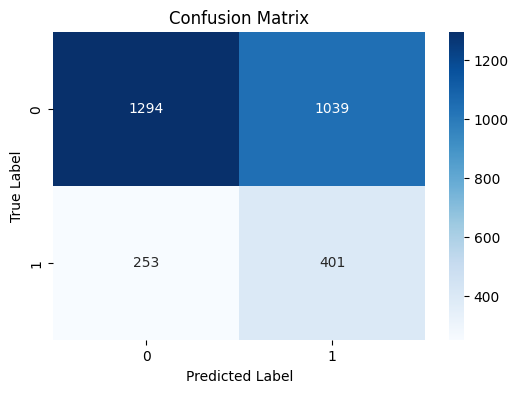

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the entire dataset
predictions = model.predict(X)

# Convert predictions to 1D array and apply the threshold
predictions = np.where(predictions.flatten() > 0.6, 1, 0)

# Create a new DataFrame with the original features, true labels, and predicted labels
result_df = pd.DataFrame(data=X, columns=X.columns)
result_df['True Label'] = y
result_df['Predicted Label'] = predictions

# Get the true labels and predicted labels
true_labels = result_df['True Label']
predicted_labels = result_df['Predicted Label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


### LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the independent and dependent variables
X = filtered_df[['SWEAT index', 'K index', 'Totals totals index', 'Environmental_Stability',
               'Moisture_Indices', 'Convective_Potential', 'Temperature_Pressure',
               'Moisture_Temperature_Profiles']]
y = filtered_df['TH']

# Perform SMOTE oversampling to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Create the Logistic Regression Classifier model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate additional performance metrics
total_positives = cm[1].sum()
total_negatives = cm[0].sum()
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

pod = true_positives / total_positives  # Probability of Detection
far = false_positives / total_negatives  # False Alarm Rate
hss = 2 * ((true_positives * true_negatives) - (false_positives * false_negatives)) / (
        (true_positives + false_negatives) * (false_positives + true_negatives) +
        (true_positives + false_positives) * (false_negatives + true_negatives))  # Heidke Skill Score
csi = true_positives / (true_positives + false_positives + false_negatives)  # Critical Success Index

# Print the evaluation metrics and additional performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


Accuracy: 0.6541755888650964
Precision: 0.6328413284132841
Recall: 0.734475374732334
F1-score: 0.6798810703666998
Probability of Detection (POD): 0.734475374732334
False Alarm Rate (FAR): 0.4261241970021413
Heidke Skill Score (HSS): 0.3123796605760499
Critical Success Index (CSI): 0.515015015015015


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


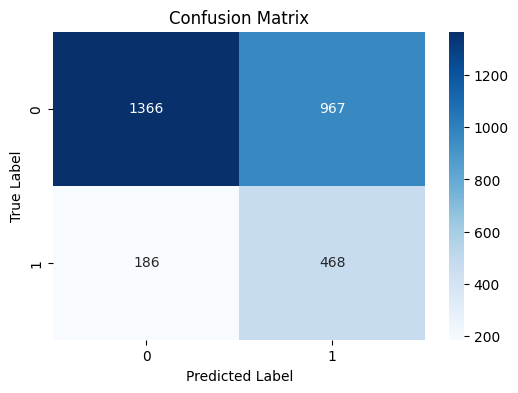

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the entire dataset
predictions = model.predict(X)

# Convert predictions to 1D array and apply the threshold
predictions = np.where(predictions.flatten() > 0.6, 1, 0)

# Create a new DataFrame with the original features, true labels, and predicted labels
result_df = pd.DataFrame(data=X, columns=X.columns)
result_df['True Label'] = y
result_df['Predicted Label'] = predictions

# Get the true labels and predicted labels
true_labels = result_df['True Label']
predicted_labels = result_df['Predicted Label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


# TESSTTTTTTT

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define the input values for prediction
input_values = np.array([[120.7, 29.2, 45.9, 1.3, 43.7, -467.7, 5723, 875.96]])


# Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler on the training data
# scaler.fit(X_train)

# # Standardize the input values using the scaler
# input_values_scaled = scaler.transform(input_values)

# Make predictions on the scaled input values
prediction = model.predict(input_values)
print(prediction)


[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
result_df

,SWEAT index,K index,Totals totals index,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles,True Label,Predicted Label
2,128.3,17.5,41.6,13.8,65.4,0.0,5581,1263.50,0,0
3,194.2,23.5,50.6,4.0,79.2,221.6,5578,1252.45,0,0
30,71.9,7.2,35.6,18.0,59.8,0.0,5617,1194.67,0,0
31,126.5,7.8,32.0,21.4,55.6,0.0,5640,1254.25,0,0
32,109.3,6.8,31.8,25.2,54.8,0.0,5684,1254.41,0,0
...,...,...,...,...,...,...,...,...,...,...
11625,49.7,19.0,30.7,16.1,58.5,0.0,5760,1150.84,0,0
11626,132.5,1.6,36.3,16.4,58.0,0.0,5744,1169.71,0,0
11653,74.2,5.3,31.0,17.9,50.0,0.0,5720,1186.96,0,0
11654,150.4,6.1,34.8,14.0,55.2,0.0,5693,1217.64,0,0


# FULL YEAR MODELS

In [ ]:
merged_df = merged_df.drop(['Date'], axis=1)

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the independent and dependent variables
X = merged_df[['SWEAT index', 'K index', 'Totals totals index', 'Environmental_Stability',
               'Moisture_Indices', 'Convective_Potential', 'Temperature_Pressure',
               'Moisture_Temperature_Profiles']]
y = merged_df['TH']

# Perform SMOTE oversampling to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create the Random Forest Classifier model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate additional performance metrics
total_positives = cm[1].sum()
total_negatives = cm[0].sum()
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

pod = true_positives / total_positives  # Probability of Detection
far = false_positives / total_negatives  # False Alarm Rate
hss = 2 * ((true_positives * true_negatives) - (false_positives * false_negatives)) / (
        (true_positives + false_negatives) * (false_positives + true_negatives) +
        (true_positives + false_positives) * (false_negatives + true_negatives))  # Heidke Skill Score
csi = true_positives / (true_positives + false_positives + false_negatives)  # Critical Success Index

# Print the evaluation metrics and additional performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


Accuracy: 0.8212379935965849
Precision: 0.7687105500450857
Recall: 0.9156820622986036
F1-score: 0.8357843137254901
Probability of Detection (POD): 0.9156820622986036
False Alarm Rate (FAR): 0.27200424178154825
Heidke Skill Score (HSS): 0.6546951372806169
Critical Success Index (CSI): 0.7178947368421053


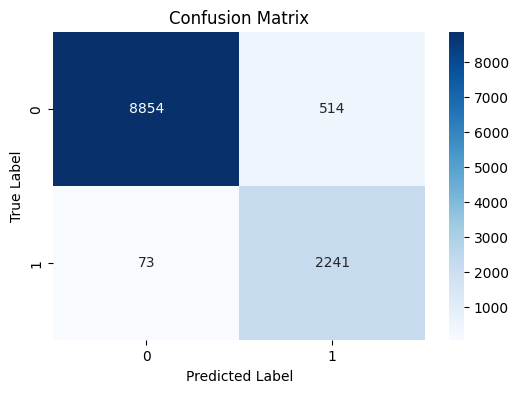

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the entire dataset
predictions = model.predict(X)

# Convert predictions to 1D array and apply the threshold
predictions = np.where(predictions.flatten() > 0.6, 1, 0)

# Create a new DataFrame with the original features, true labels, and predicted labels
result_df = pd.DataFrame(data=X, columns=X.columns)
result_df['True Label'] = y
result_df['Predicted Label'] = predictions

# Get the true labels and predicted labels
true_labels = result_df['True Label']
predicted_labels = result_df['Predicted Label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
result_df

,SWEAT index,K index,Totals totals index,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles,True Label,Predicted Label
0,91.2,-1.4,24.7,25.8,22.8,0.0,5636,993.98,0,0
1,75.7,1.6,30.3,21.5,20.4,0.0,5592,956.13,0,0
2,128.3,17.5,41.6,13.8,23.8,0.0,5581,978.71,0,0
3,194.2,23.5,50.6,4.0,28.6,-55.4,5578,965.77,0,0
4,151.4,25.4,43.8,6.9,33.2,-65.0,5648,975.72,0,0
...,...,...,...,...,...,...,...,...,...,...
11677,75.7,-19.9,-2.5,34.3,9.5,0.0,5731,876.91,0,0
11678,67.9,-6.5,-1.1,31.4,11.4,0.0,5718,893.60,0,0
11679,98.9,-15.2,23.4,32.3,13.4,0.0,5717,862.08,0,0
11680,135.8,-6.5,29.5,25.6,16.2,0.0,5715,892.90,0,0


In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print additional performance metrics
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


Confusion Matrix:
[[1373  513]
 [ 157 1705]]
Probability of Detection (POD): 0.9156820622986036
False Alarm Rate (FAR): 0.27200424178154825
Heidke Skill Score (HSS): 0.6546951372806169
Critical Success Index (CSI): 0.7178947368421053


# Unseen


In [ ]:
import pandas as pd

# Load the input dataframe
unseen_df = pd.read_csv('/content/merged_df_all12KOL_combined.csv')

# Print the input dataframe
print(unseen_df)


     SWEAT index  K index  Totals totals index        Date  \
0           58.2     -7.8                 16.2  02/01/2021   
1           58.2      4.7                 23.5  03/01/2021   
2           86.6      2.6                 37.8  04/01/2021   
3           54.3      3.2                 29.8  05/01/2021   
4           33.0      7.7                 33.8  06/01/2021   
..           ...      ...                  ...         ...   
515        161.8     23.1                 41.8  26/12/2022   
516        183.8     26.2                 38.8  27/12/2022   
517        216.3     14.2                 38.9  28/12/2022   
518         90.5      8.0                 24.9  30/12/2022   
519        106.7     16.9                 25.7  31/12/2022   

     Environmental_Stability  Moisture_Indices  Convective_Potential  \
0                       19.9              13.8                   0.0   
1                       24.0              19.7                   0.0   
2                       15.4           

In [ ]:
import pandas as pd

# Remove the 'TH' and 'Date' columns from the unseen_df
input_df = unseen_df.drop(['TH', 'Date'], axis=1)

# Make predictions on the input data
predictions = model.predict(input_df)

# Create a new dataframe to store the true and predicted values
result_df = pd.DataFrame({'True_TH': unseen_df['TH'], 'Predicted_TH': predictions})

# Print the resulting dataframe
print(result_df)


     True_TH  Predicted_TH
0          0             0
1          0             0
2          0             0
3          0             0
4          0             0
..       ...           ...
515        0             0
516        0             0
517        0             0
518        0             0
519        0             0

[520 rows x 2 columns]


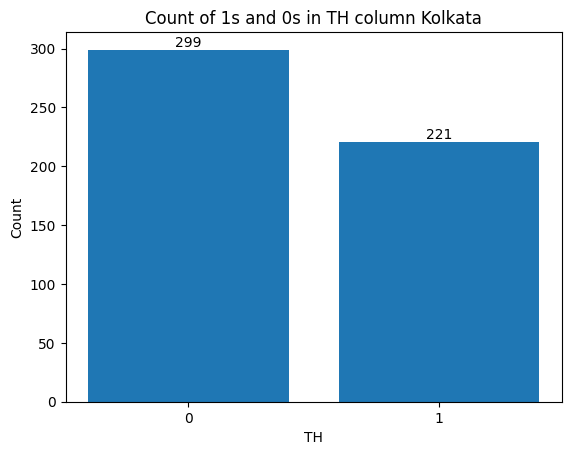

In [ ]:
import matplotlib.pyplot as plt

th_counts = result_df['Predicted_TH'].value_counts()

# Plotting the counts
plt.bar(th_counts.index, th_counts.values)

# Adding labels and title
plt.xlabel('TH')
plt.ylabel('Count')
plt.title('Count of 1s and 0s in TH column Kolkata')

# Customizing x-axis tick labels
plt.xticks([0, 1], ['0', '1'])

# Adding count labels on top of each bar
for i, count in enumerate(th_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

In [ ]:
result_df

,True_TH,Predicted_TH
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
515,0,0
516,0,0
517,0,0
518,0,0


In [ ]:
# Count the occurrences of predicted 'TH' values
predicted_counts = result_df['Predicted_TH'].value_counts()

# Print the counts
print(predicted_counts)


0    299
1    221
Name: Predicted_TH, dtype: int64


In [ ]:
result_df.to_csv('med.csv', index=False)